In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\data science\folder mentoring\melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


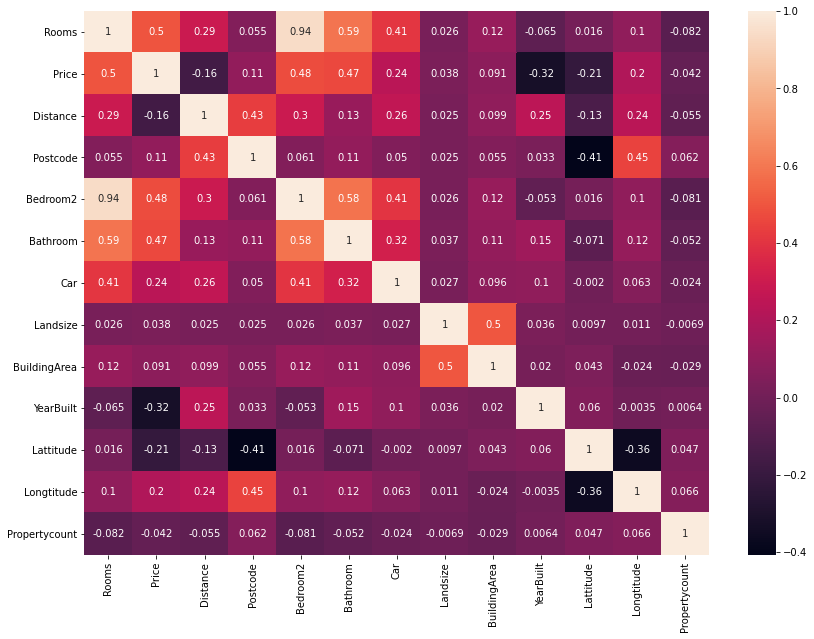

In [3]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.dropna(subset=['Car','BuildingArea','YearBuilt'], inplace=True)

In [7]:
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea      634
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
data =  pd.get_dummies(df, columns=['Type'])
data

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0
6,Abbotsford,124 Yarra St,3,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,...,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,1,0,0
7,Abbotsford,98 Charles St,2,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,...,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,2.0,...,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0,1,0,0
13573,Werribee,5 Nuragi Ct,4,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,...,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0,1,0,0
13576,Williamstown,77 Merrett Dr,3,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,1,0,0
13578,Williamstown,96 Verdon St,4,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,1,0,0


In [9]:
X = data.drop(columns = ['Suburb','Address','Method','SellerG','Date','Distance','Postcode','CouncilArea','Lattitude','Longtitude','Regionname','Price'])
y = np.log(df['Price'])

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.2, random_state=24)

# Linear Regression

In [12]:
linreg= LinearRegression()

In [13]:
linreg.fit(X_train,y_train)


LinearRegression()

In [14]:
X.columns

Index(['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Propertycount', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object')

In [15]:
linreg.coef_

array([ 8.65548855e-02,  3.68804835e-03,  2.14775418e-01,  1.92112988e-02,
        1.57049173e-05,  1.19542487e-03, -5.21758459e-03, -2.37101158e-06,
        7.34359280e-02,  7.79276126e-02, -1.51363541e-01])

In [16]:
linreg.fit(X,y)

LinearRegression()

In [17]:
pred_train = linreg.predict(X_train)

In [18]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

0.27801213020007554

In [19]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

0.12875721585235292

In [20]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

0.3588275572644232

In [21]:
R2_train = r2_score(y_train, pred_train)
R2_train

0.5662169085414892

In [22]:
print("Hasil Evaluasi Data Training ")
print("Nilai MAE : ", MAE_train)
print("Nilai MSE : ", MSE_train)
print("Nilai RMSE : ", RMSE_train)
print("Nilai R2 : ", R2_train)

Hasil Evaluasi Data Training 
Nilai MAE :  0.27801213020007554
Nilai MSE :  0.12875721585235292
Nilai RMSE :  0.3588275572644232
Nilai R2 :  0.5662169085414892


In [23]:
linreg.score(X_test, y_test)

0.5653266759031452

In [24]:
linreg.score(X_train, y_train)

0.5662169085414892

In [25]:
y_train #aktual train

3486     13.253392
598      14.187074
9047     13.976779
879      13.581053
506      14.557448
           ...    
6438     13.272506
605      13.955273
12557    15.671809
1648     14.890513
8605     14.234221
Name: Price, Length: 5464, dtype: float64

In [26]:
pred_train_linreg = linreg.predict(X_train)

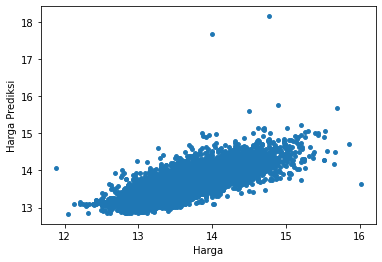

In [27]:
plt.scatter(y_train, pred_train_linreg, s=15)

plt.xlabel('Harga')
plt.ylabel('Harga Prediksi')

plt.show()

In [28]:
pred_test_linreg = linreg.predict(X_test)

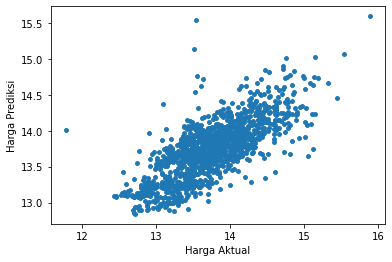

In [29]:
plt.scatter(y_test, pred_test_linreg, s=15)

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.show()

# Ridge Regression

In [30]:
ridge = Ridge(alpha=1)

In [31]:
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [32]:
y_ridge_prediction= ridge.predict(X_test)

In [33]:
r2_ridge = ridge.score(X_test, y_test)

In [34]:
MAE_ridge = mean_absolute_error(y_test, y_ridge_prediction)

In [35]:
MSE_ridge = mean_absolute_error(y_test, y_ridge_prediction)

In [36]:
RMSE_ridge = np.sqrt(MSE_ridge)

In [37]:
print("Hasil Evaluasi Data Training Ridge Regression ")
print("Nilai MAE : ", MAE_ridge)
print("Nilai MSE : ", MSE_ridge)
print("Nilai RMSE : ", RMSE_ridge)
print("Nilai R2 : ", r2_ridge)

Hasil Evaluasi Data Training Ridge Regression 
Nilai MAE :  0.2725704188861607
Nilai MSE :  0.2725704188861607
Nilai RMSE :  0.5220827701487195
Nilai R2 :  0.5599851625074199


In [38]:
ridge.score(X_train, y_train)

0.566742448989674

In [39]:
ridge.score(X_test,y_test)

0.5599851625074199

In [40]:
y_test

10248    13.712370
5142     13.180632
9997     14.006131
6569     13.322852
6219     14.006131
           ...    
6627     13.968232
2434     14.244041
4011     13.190022
12791    13.626768
6479     13.001325
Name: Price, Length: 1366, dtype: float64

In [41]:
pred_test_ridge = ridge.predict(X_test)
pred_test_ridge

array([13.3712269 , 13.25272938, 13.67014358, ..., 13.42658288,
       13.55196205, 13.48894487])

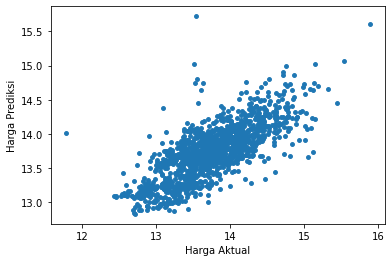

In [42]:
plt.scatter(y_test, pred_test_ridge, s=15)

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.show()

In [43]:
pred_train_ridge = ridge.predict(X_train)

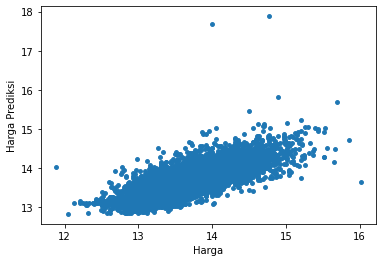

In [44]:
plt.scatter(y_train, pred_train_ridge, s=15)

plt.xlabel('Harga')
plt.ylabel('Harga Prediksi')

plt.show()

In [45]:
ridge_tuning = Ridge()

In [46]:
param_ridge ={'alpha' :[1,0.5,0.1,5,15,30,30],
            'fit_intercept':[True, False],
            'normalize': [False, True],
            'copy_X':[True,False],
            'max_iter':[None, 10, 100,1000],
            'tol': [0.001, 0.005, 0.01]}

In [47]:
model_ridge_tuned = GridSearchCV(estimator = ridge_tuning, param_grid = param_ridge, n_jobs=-1, cv=5, verbose = 1)

In [48]:
model_ridge_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:    6.7s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.1, 5, 15, 30, 30],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 10, 100, 1000],
                         'normalize': [False, True],
                         'tol': [0.001, 0.005, 0.01]},
             verbose=1)

In [49]:
ridge_tuned_train = model_ridge_tuned.best_score_
ridge_tuned_train 


0.5543210743686449

In [50]:
ridge_tuned = model_ridge_tuned.best_estimator_
ridge_tuned_train

0.5543210743686449

In [51]:
model_ridge_tuned.best_params_

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': True,
 'tol': 0.001}

In [52]:
y_ridge_tuned = ridge_tuned.predict(X_test)

In [53]:
r2_tuned_ridge = r2_score(y_test, y_ridge_tuned)
MAE_ridge_tuned = mean_absolute_error(y_test, y_ridge_tuned)
MSE_ridge_tuned = mean_squared_error(y_test,y_ridge_tuned)
RMSE_ridge_tuned = np.sqrt(MSE_ridge_tuned)

In [54]:
print("Hasil Evaluasi Data Training Lasso Regre ")
print("Nilai MAE : ", MAE_ridge_tuned)
print("Nilai MSE : ", MSE_ridge_tuned)
print("Nilai RMSE : ", RMSE_ridge_tuned)
print("Nilai R2 : ", r2_tuned_ridge)

Hasil Evaluasi Data Training Lasso Regre 
Nilai MAE :  0.27505383853804266
Nilai MSE :  0.1259885070695882
Nilai RMSE :  0.3549485977850711
Nilai R2 :  0.5547702031622804


In [55]:
model_ridge_tuned.score(X_train, y_train)

0.5641594447474656

In [56]:
model_ridge_tuned.score(X_test, y_test)

0.5547702031622804

# Lasso Regression

In [57]:
lasso = Lasso()

In [58]:
lasso.fit(X_train,y_train)

Lasso()

In [59]:
y_lasso_pred = lasso.predict(X_test)

In [60]:
lasso_train = lasso.score(X_train, y_train)

In [61]:
r2_lasso = lasso.score(X_test, y_test)
MAE_lasso = mean_absolute_error(y_test, y_lasso_pred)
MSE_lasso = mean_squared_error(y_test, y_lasso_pred)
RMSE_lasso = np.sqrt(MSE_lasso)

In [62]:
print("Hasil Evaluasi Data Training Lasso Regre ")
print("Nilai MAE : ", MAE_lasso)
print("Nilai MSE : ", MSE_lasso)
print("Nilai RMSE : ", RMSE_lasso)
print("Nilai R2 : ", r2_lasso)

Hasil Evaluasi Data Training Lasso Regre 
Nilai MAE :  0.3093200604190462
Nilai MSE :  0.16842810351807816
Nilai RMSE :  0.4103999311867366
Nilai R2 :  0.4047932461831858


In [63]:
pred_test_lasso = lasso.predict(X_test)

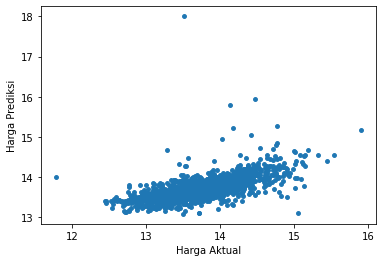

In [64]:
plt.scatter(y_test, pred_test_lasso, s=15)

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.show()

In [65]:
pred_train_lasso = lasso.predict(X_train)

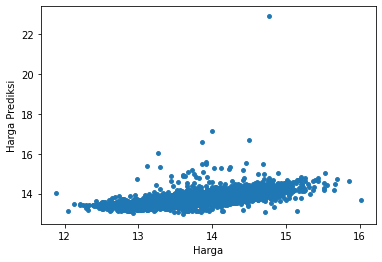

In [66]:
plt.scatter(y_train, pred_train_lasso, s=15)

plt.xlabel('Harga')
plt.ylabel('Harga Prediksi')

plt.show()

In [67]:
lasso.score(X_train, y_train)

0.40916209664650804

In [68]:
lasso.score(X_test, y_test)

0.4047932461831858

In [69]:
lasso_tuning = Lasso()
param_lasso = {'alpha' :[1,0.5,0.1,5,15,30,60],
            'fit_intercept':[True, False],
            'normalize': [False, True],
            'copy_X':[True,False],
            'max_iter':[1000, 2000, 5000],
            'tol': [0.001, 0.005, 0.01]}

In [70]:
model_lasso_tuned = GridSearchCV(estimator = lasso_tuning, param_grid = param_lasso, n_jobs=-1, cv=5, verbose=-1)


In [71]:
model_lasso_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.1, 5, 15, 30, 60],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [False, True],
                         'tol': [0.001, 0.005, 0.01]},
             verbose=-1)

In [72]:
lasso_tuned_train = model_lasso_tuned.best_score_
lasso_tuned_train 

0.4063341816701209

In [73]:
lasso_tuned =model_lasso_tuned.best_estimator_
lasso_tuned

Lasso(alpha=0.1, tol=0.01)

In [74]:
y_lasso_tuned = lasso_tuned.predict(X_test)

In [75]:
r2_tuned_lasso = r2_score(y_test, y_lasso_tuned)
MAE_lasso_tuned = mean_absolute_error(y_test, y_lasso_tuned)
MSE_lasso_tuned = mean_squared_error(y_test, y_lasso_tuned)
RMSE_lasso_tuned = np.sqrt(MSE_lasso_tuned)

In [76]:
print("Hasil Evaluasi Data Training Lasso Regre ")
print("Nilai MAE : ", MAE_lasso_tuned)
print("Nilai MSE : ", MSE_lasso_tuned)
print("Nilai RMSE : ", RMSE_lasso_tuned)
print("Nilai R2 : ", r2_tuned_lasso)

Hasil Evaluasi Data Training Lasso Regre 
Nilai MAE :  0.2994037709975411
Nilai MSE :  0.15689228423602222
Nilai RMSE :  0.39609630676897534
Nilai R2 :  0.4455595874532634


In [77]:
model_lasso_tuned.score(X_train, y_train)

0.4482653974940367

In [78]:
model_lasso_tuned.score(X_test, y_test)

0.4455595874532634

In [79]:
import joblib

In [80]:
joblib.dump(linreg,'Linreg')

['Linreg']

# random forest

In [81]:
RF = RandomForestRegressor()

In [82]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_base_RF = RF.predict(X_test)

In [84]:
RF_train = RF.score(X_train, y_train)

In [85]:
r2_RF = r2_score(y_test, y_base_RF)
MAE_RF = mean_absolute_error(y_test, y_base_RF)
MSE_RF = mean_squared_error(y_test, y_base_RF)
RMSE_RF = np.sqrt(MSE_RF)

In [86]:
print("Hasil Evaluasi Data Training Random Forest Regre ")
print("Nilai MAE : ", MAE_RF)
print("Nilai MSE : ", MSE_RF)
print("Nilai RMSE : ", RMSE_RF)
print("Nilai R2 : ", r2_RF)

Hasil Evaluasi Data Training Random Forest Regre 
Nilai MAE :  0.21006625059182996
Nilai MSE :  0.08227635473416355
Nilai RMSE :  0.28683855168746675
Nilai R2 :  0.7092442354078645


In [87]:
RF_tuning= RandomForestRegressor()
param_RF = {"n_estimators" : [100, 200, 500, 700, 1000],
          "max_depth" : [None, 5, 7, 9, 20, 25],
          "min_samples_split" : [2, 9, 15, 25],
          "min_samples_leaf" : [1, 2, 5, 10],
          "max_features" : [None, .8, .7, .6]}

In [88]:
model_RF_tuned = GridSearchCV(estimator = RF_tuning, param_grid = param_RF, n_jobs=-1, cv=3, verbose =1)

In [89]:
model_RF_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 35.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9, 20, 25],
                         'max_features': [None, 0.8, 0.7, 0.6],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 9, 15, 25],
                         'n_estimators': [100, 200, 500, 700, 1000]},
             verbose=1)

In [90]:
RF_tuned_train = model_RF_tuned.best_score_
RF_tuned_train

0.7140426246299074

In [91]:
RF_tuned = model_RF_tuned.best_estimator_
RF_tuned

RandomForestRegressor(max_features=0.6, n_estimators=700)

In [114]:
model_RF_tuned.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [92]:
y_RF_tuned = RF_tuned.predict(X_test)

In [93]:
r2_RF_tuned = r2_score(y_test, y_RF_tuned)
MAE_RF_tuned = mean_absolute_error(y_test, y_RF_tuned)
MSE_RF_tuned = mean_squared_error(y_test, y_RF_tuned)
RMSE_RF_tuned = np.sqrt(MSE_RF_tuned)

In [94]:
print("Hasil Evaluasi Data Training Random Forest Regre ")
print("Nilai MAE : ", MAE_RF_tuned)
print("Nilai MSE : ", MSE_RF_tuned)
print("Nilai RMSE : ", RMSE_RF_tuned)
print("Nilai R2 : ", r2_RF_tuned)

Hasil Evaluasi Data Training Random Forest Regre 
Nilai MAE :  0.2071462903639261
Nilai MSE :  0.08014010452654499
Nilai RMSE :  0.2830902762839886
Nilai R2 :  0.716793513259115


In [95]:
RF_tuning.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
#score rf

In [97]:
RF.score(X_train, y_train)

0.9602449144356329

In [98]:
RF.score(X_test, y_test)

0.7092442354078645

In [99]:
#sebelum tuning

In [100]:
pred_test_RF = RF.predict(X_test)

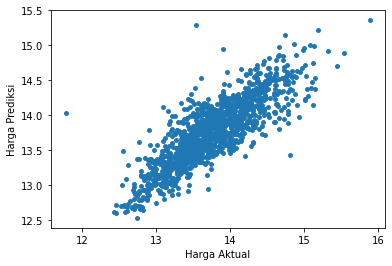

In [101]:
plt.scatter(y_test, pred_test_RF, s=15)

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.show()

In [102]:
pred_train_RF = RF.predict(X_train)

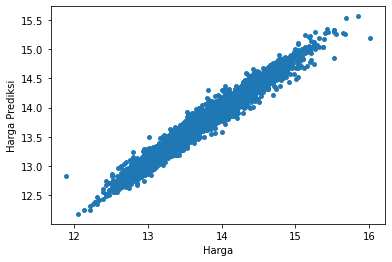

In [103]:
plt.scatter(y_train, pred_train_RF, s=15)

plt.xlabel('Harga')
plt.ylabel('Harga Prediksi')

plt.show()

In [104]:
#sesudah tuning--. rf_tuning

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier()

In [107]:
RF.fit(X,y)

RandomForestRegressor()

In [118]:
import joblib

In [120]:
joblib.dump(RF_tuned,'Rrff')

['Rrff']